# General Overview - Data Visualization

Using a clean dataset, we look for correlations between the independent variables and the target variable, the likelihood of being readmitted to the hospital, using graphs and plots. This is also a good time to get a better understanding of patient demographics, their experiences at the hospital, what medications are / are not using, and their diagnosed conditions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes_cleaned.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [3]:
diabetes.head(10)

,patient_nbr,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,8222157,Caucasian,Female,[0-10),Unknown,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,NO,Unknown
1,55629189,Caucasian,Female,[10-20),Home,7,3,Unknown,59,0,...,No,No,Up,No,No,No,Ch,Yes,YES,Emergency
2,86047875,AfricanAmerican,Female,[20-30),Home,7,2,Unknown,11,5,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,82442376,Caucasian,Male,[30-40),Home,7,2,Unknown,44,1,...,No,No,Up,No,No,No,Ch,Yes,NO,Emergency
4,42519267,Caucasian,Male,[40-50),Home,7,1,Unknown,51,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
5,82637451,Caucasian,Male,[50-60),Home,2,3,Unknown,31,6,...,No,No,Steady,No,No,No,No,Yes,YES,Urgent
6,84259809,Caucasian,Male,[60-70),Home,2,4,Unknown,70,1,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective
7,114882984,Caucasian,Male,[70-80),Home,7,5,Unknown,73,0,...,No,No,No,No,No,No,No,Yes,YES,Emergency
8,48330783,Caucasian,Female,[80-90),Home,4,13,Unknown,68,2,...,No,No,Steady,No,No,No,Ch,Yes,NO,Urgent
9,63555939,Caucasian,Female,[90-100),Hospital,4,12,InternalMedicine,33,3,...,No,No,Steady,No,No,No,Ch,Yes,NO,Elective


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67874 entries, 0 to 67873
Data columns (total 43 columns):
patient_nbr                 67874 non-null int64
race                        67874 non-null object
gender                      67874 non-null object
age                         67874 non-null object
discharge_disposition_id    67874 non-null object
admission_source_id         67874 non-null int64
time_in_hospital            67874 non-null int64
medical_specialty           67874 non-null object
num_lab_procedures          67874 non-null int64
num_procedures              67874 non-null int64
num_medications             67874 non-null int64
number_outpatient           67874 non-null int64
number_emergency            67874 non-null int64
number_inpatient            67874 non-null int64
diag_1                      67874 non-null object
diag_2                      67874 non-null object
diag_3                      67874 non-null object
number_diagnoses            67874 non-null int64
m

Columns use num and number in their names, so to keep them consistent, all columns will use num.

In [5]:
diabetes = diabetes.rename(columns={'number_outpatient':'num_outpatient', 
                                    'number_emergency':'num_emergency', 
                                    'number_inpatient':'num_inpatient', 
                                    'number_diagnoses':'num_diagnoses'})

In [6]:
# drop the patient number column since each patient is unique
diabetes = diabetes.drop(columns=['patient_nbr'])

In [7]:
round(diabetes.describe(), 2)

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00,67874.00
mean,4.42,4.28,42.85,1.43,15.67,0.28,0.11,0.18,7.25
std,2.97,2.94,19.93,1.76,8.28,1.07,0.52,0.61,1.99
min,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,7.00,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,7.00,6.00,57.00,2.00,20.00,0.00,0.00,0.00,9.00
max,25.00,14.00,132.00,6.00,81.00,42.00,42.00,12.00,16.00


# readmitted patients overall

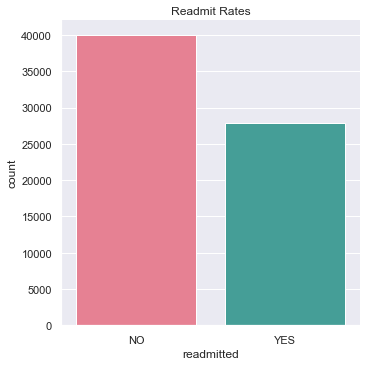

In [8]:
sns.catplot(x='readmitted', kind='count', palette='husl', data=diabetes)
plt.title('Readmit Rates')
plt.show()

In [9]:
round(diabetes.readmitted.value_counts(normalize=True), 4) * 100

NO     58.93
YES    41.07
Name: readmitted, dtype: float64

59% of patients are not readmitted while 41% of patients are readmitted within or after 30 days.

In [10]:
# shows the numbers for each comparison and their totals
def chart_display(x, y):
    return pd.crosstab(x, y, margins=True, margins_name='Total')

In [11]:
# crosstab function, return percentages, round to 2 decimal places
def percent(x, y):
    return round(pd.crosstab(x, y, normalize='columns'), 4) * 100

# patient demographics, gender, and age

## demographics

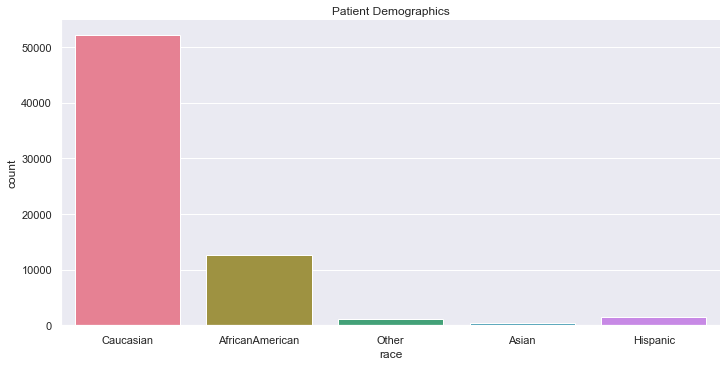

In [12]:
sns.catplot(x='race', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Patient Demographics')
plt.show()

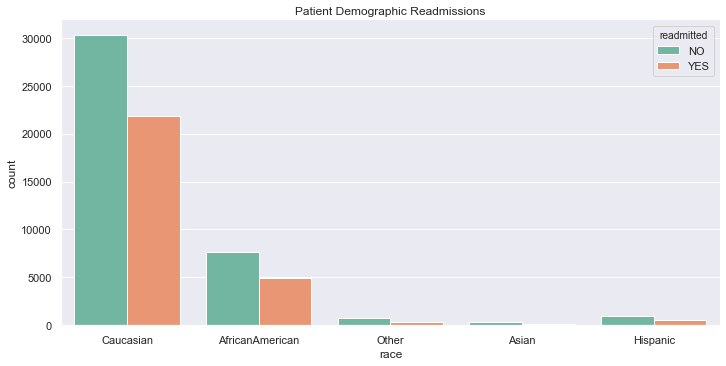

In [13]:
sns.catplot(x='race', hue='readmitted', kind='count', palette='Set2', aspect=2, data=diabetes, legend_out=False)
plt.title('Patient Demographic Readmissions')
plt.show()

In [14]:
chart_display(diabetes.race, diabetes.readmitted)

readmitted,NO,YES,Total
race,,,
AfricanAmerican,7638,4956,12594
Asian,340,148,488
Caucasian,30299,21849,52148
Hispanic,964,531,1495
Other,759,390,1149
Total,40000,27874,67874


## gender

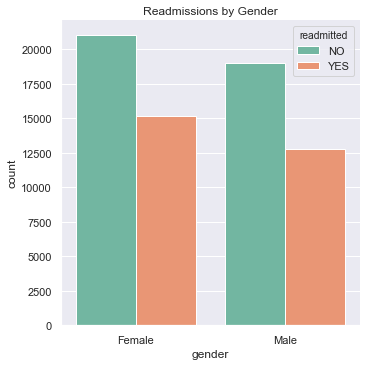

In [15]:
sns.catplot(x='gender', hue='readmitted', kind='count', palette='Set2', data=diabetes, legend_out=False)
plt.title('Readmissions by Gender')
plt.show()

In [16]:
chart_display(diabetes.gender, diabetes.readmitted)

readmitted,NO,YES,Total
gender,,,
Female,21035,15129,36164
Male,18965,12745,31710
Total,40000,27874,67874


## age groups

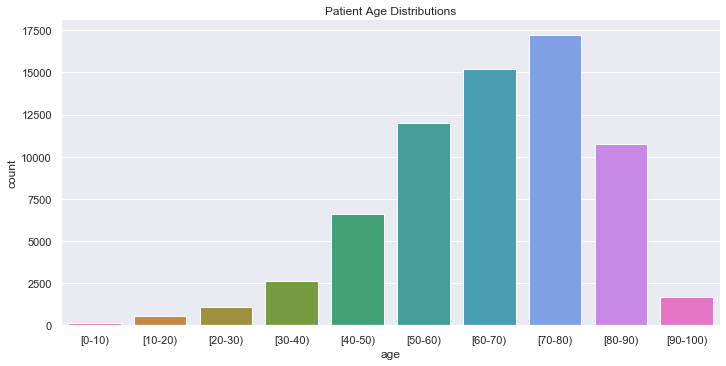

In [17]:
sns.catplot(x='age', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Patient Age Distributions')
plt.show()

It looks like most patients are older, 50+ years old, though there aren't many patients over 90.

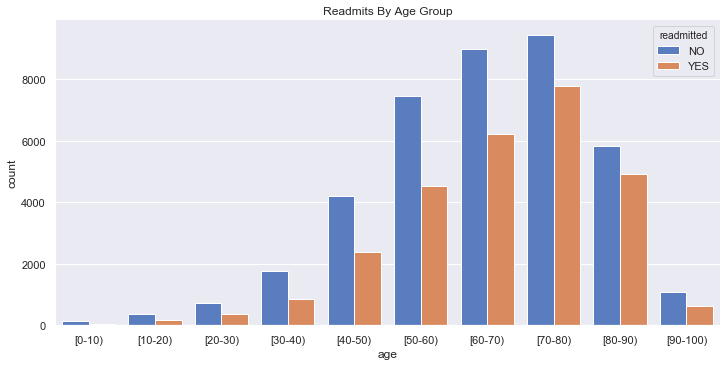

In [18]:
sns.catplot(x='age', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmits By Age Group')
plt.show()

In every age group, the majority of patients are not readmitted. Readmissions that do occur mostly happen after 30 days, and a small number of patients are back within 30 days. The 70-80 age group has the highest patient numbers for all three readmit possibilities, and they also account for the majority of patients admitted.

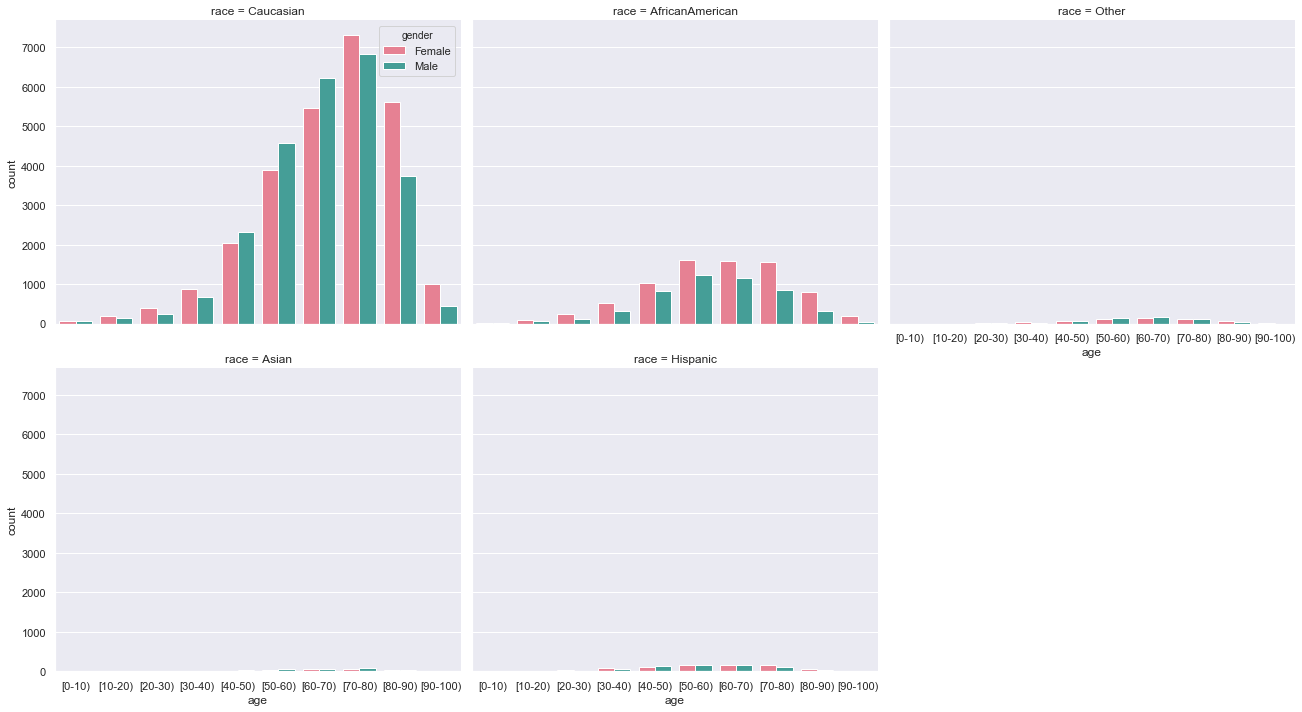

In [19]:
sns.catplot(x='age', hue='gender', col='race', col_wrap=3, palette='husl', data=diabetes, aspect=1.2, kind='count', legend_out=False)
plt.show()

In [20]:
chart_display([diabetes.race, diabetes.readmitted], diabetes.age)

age                         [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  \
race            readmitted                                               
AfricanAmerican NO              11      107      259      556     1179   
                YES              5       48      113      277      667   
Asian           NO               2        2        6        9       32   
                YES              0        0        0        3       11   
Caucasian       NO             106      226      415     1044     2760   
                YES             22      112      219      523     1604   
Hispanic        NO               2       18       39      103      151   
                YES              0        3       14       38       82   
Other           NO               4        6       13       39       96   
                YES              0        2        6       21       33   
Total                          152      524     1084     2613     6615   

age                         [50-60)  [60-70)  [70-80)  [80-90)  [90-100)  \
race            readmitted                                                 
AfricanAmerican NO             1780     1599     1370      620       157   
                YES            1076     1157     1043      501        69   
Asian           NO               72       86       81       43         7   
                YES              17       32       59       24         2   
Caucasian       NO             5215     6897     7692     5049       895   
                YES            3271     4787     6459     4308       544   
Hispanic        NO              224      200      161       59         7   
                YES              95      138      111       46         4   
Other           NO              183      202      145       63         8   
                YES              62      115      100       44         7   
Total                         11995    15213    17221    10757      1700   

age                         Total  
race            readmitted         
AfricanAmerican NO           7638  
                YES          4956  
Asian           NO            340  
                YES           148  
Caucasian       NO          30299  
                YES         21849  
Hispanic        NO            964  
                YES           531  
Other           NO            759  
                YES           390  
Total                       67874

The majority of patients are Caucasian. There are more female patients than males.

# admission type, source, and discharge disposition

We take a look at admission type, admission source, and discharge disposition (what happened after patients left the hospital).

## admission type

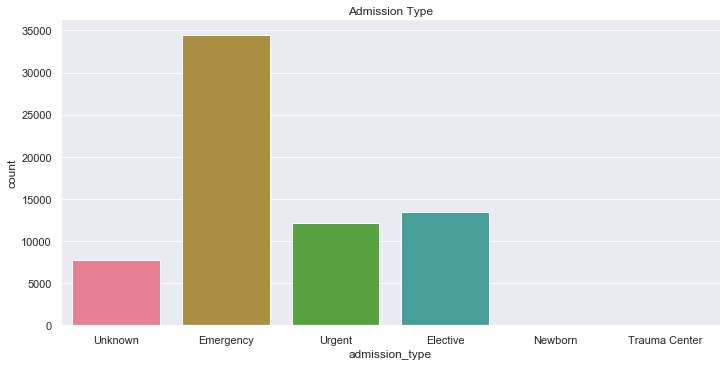

In [21]:
sns.catplot(x='admission_type', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Admission Type')
plt.show()

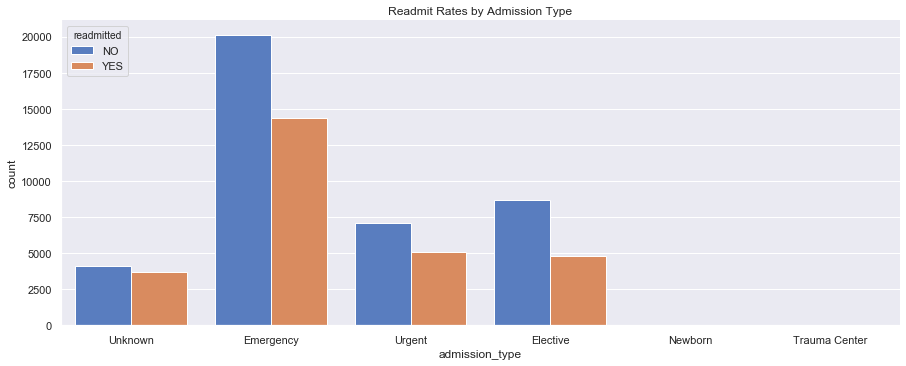

In [22]:
sns.catplot(x='admission_type', hue='readmitted', kind='count', palette='muted', aspect=2.5, data=diabetes, legend_out=False)
plt.title('Readmit Rates by Admission Type')
plt.show()

In [23]:
chart_display(diabetes.readmitted, diabetes.admission_type)

admission_type,Elective,Emergency,Newborn,Trauma Center,Unknown,Urgent,Total
readmitted,,,,,,,
NO,8663,20116,6,17,4109,7089,40000
YES,4781,14357,3,0,3663,5070,27874
Total,13444,34473,9,17,7772,12159,67874


## discharge disposition

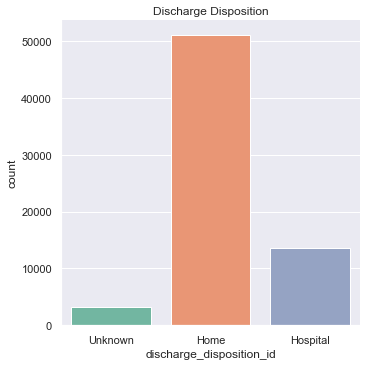

In [24]:
sns.catplot(x='discharge_disposition_id', kind='count', palette='Set2', data=diabetes, aspect=1)
plt.title('Discharge Disposition')
plt.show()

The majority of patients went home after being discharged from the hospital (ID 1). Others were sent to a skilled nursing facility (SNF) or discharged to a home with home health services, representing IDs 3 and 6 respectively.

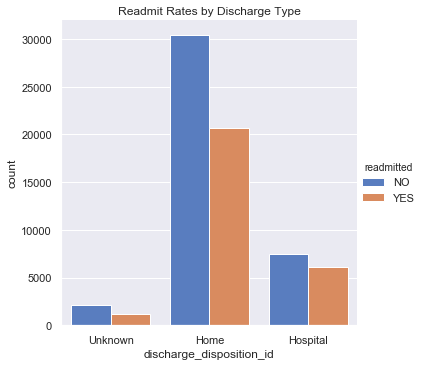

In [25]:
sns.catplot(x='discharge_disposition_id', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Discharge Type')
plt.show()

In [26]:
chart_display(diabetes.discharge_disposition_id, diabetes.readmitted)

readmitted,NO,YES,Total
discharge_disposition_id,,,
Home,30438,20643,51081
Hospital,7470,6106,13576
Unknown,2092,1125,3217
Total,40000,27874,67874


## admission source

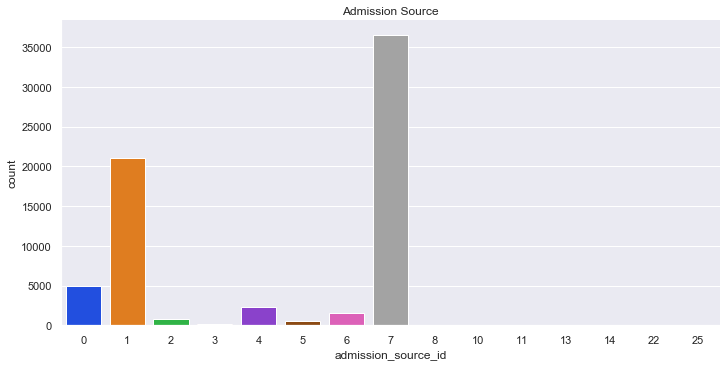

In [27]:
sns.catplot(x='admission_source_id', kind='count', palette='bright', data=diabetes, aspect=2)
plt.title('Admission Source')
plt.show()

Most patients are admitted via the emergency room, or ID 7, while others came with a physician referral, or ID 1.

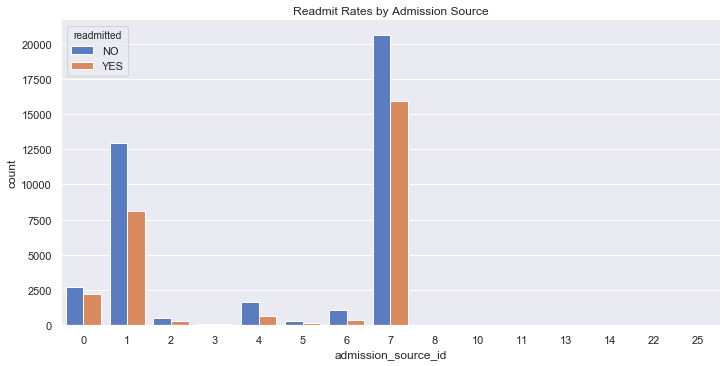

In [28]:
sns.catplot(x='admission_source_id', hue='readmitted', kind='count', palette='muted', aspect=2, data=diabetes, legend_out=False)
plt.title('Readmit Rates by Admission Source')
plt.show()

We are looking at time_in_hospital, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, and number_inpatient columns.       

## time in hospital

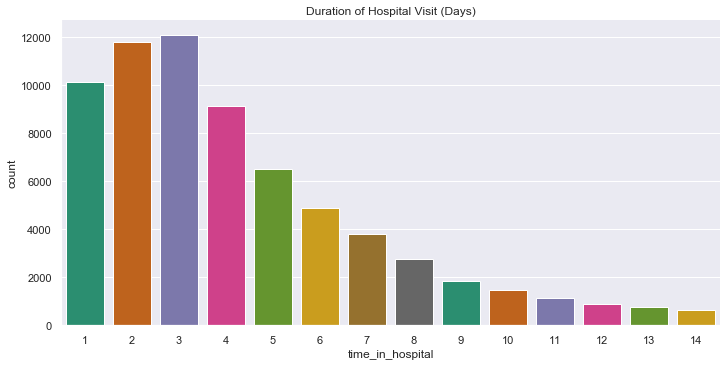

In [29]:
sns.catplot(x='time_in_hospital', kind='count', palette='Dark2', data=diabetes, aspect=2)
plt.title('Duration of Hospital Visit (Days)')
plt.show()

In [30]:
print('Average time spent in hospital: {} days'.format(round(np.mean(diabetes.time_in_hospital), 2)))
print('Median time spent in hospital: {} days'.format(round(np.median(diabetes.time_in_hospital), 2)))

Average time spent in hospital: 4.28 days
Median time spent in hospital: 3.0 days


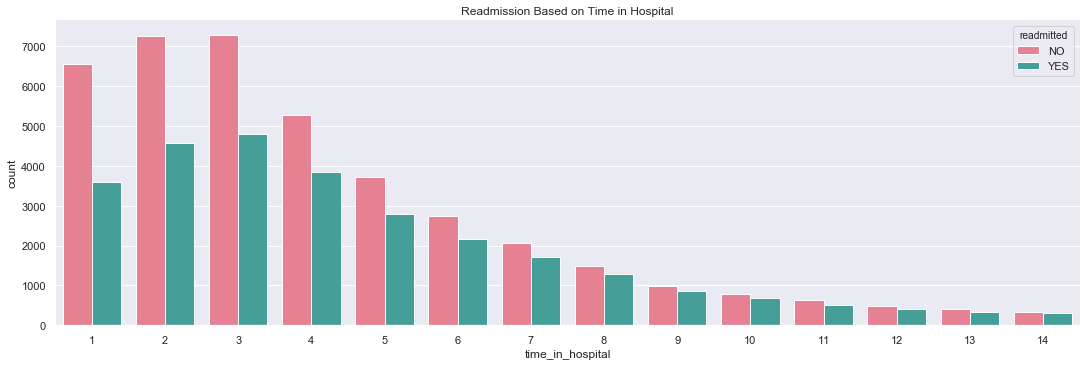

In [31]:
# does the amount of time spent in the hospital impact their chances of readmission?
sns.catplot(x='time_in_hospital', hue='readmitted', kind='count', palette='husl', aspect=3, data=diabetes, legend_out=False)
plt.title('Readmission Based on Time in Hospital')
plt.show()

## medical specialty

The majority of patients do not have a medical specialty listed for their visit.

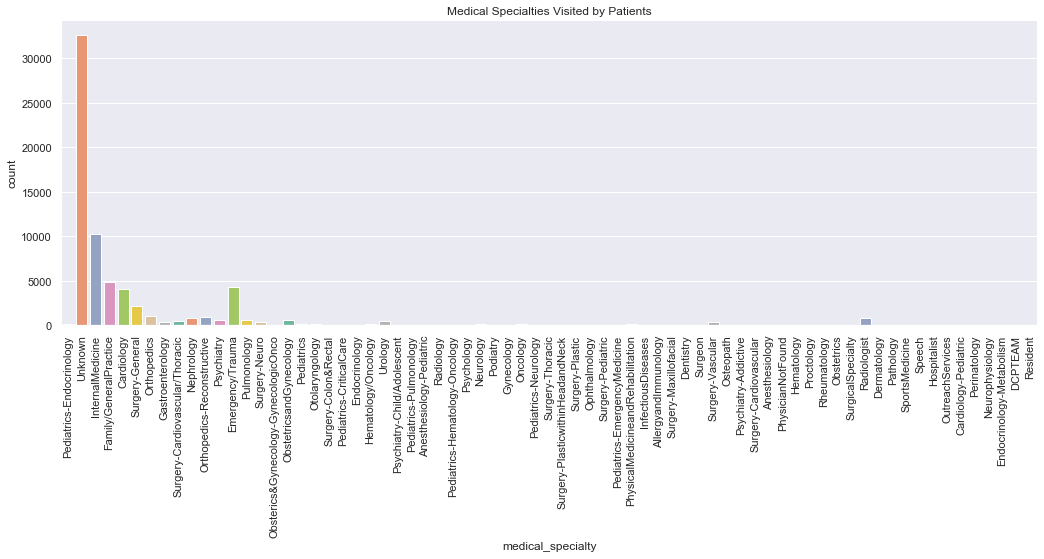

In [32]:
d = sns.catplot(x='medical_specialty', kind='count', palette='Set2', aspect=3, data=diabetes)
d.set_xticklabels(rotation=90)
plt.title('Medical Specialties Visited by Patients')
plt.show()

Since the information on patients' medical specialty is lacking, we are going to remove this column from the dataset.

In [33]:
diabetes = diabetes.drop(columns=['medical_specialty'])

## number of lab procedures

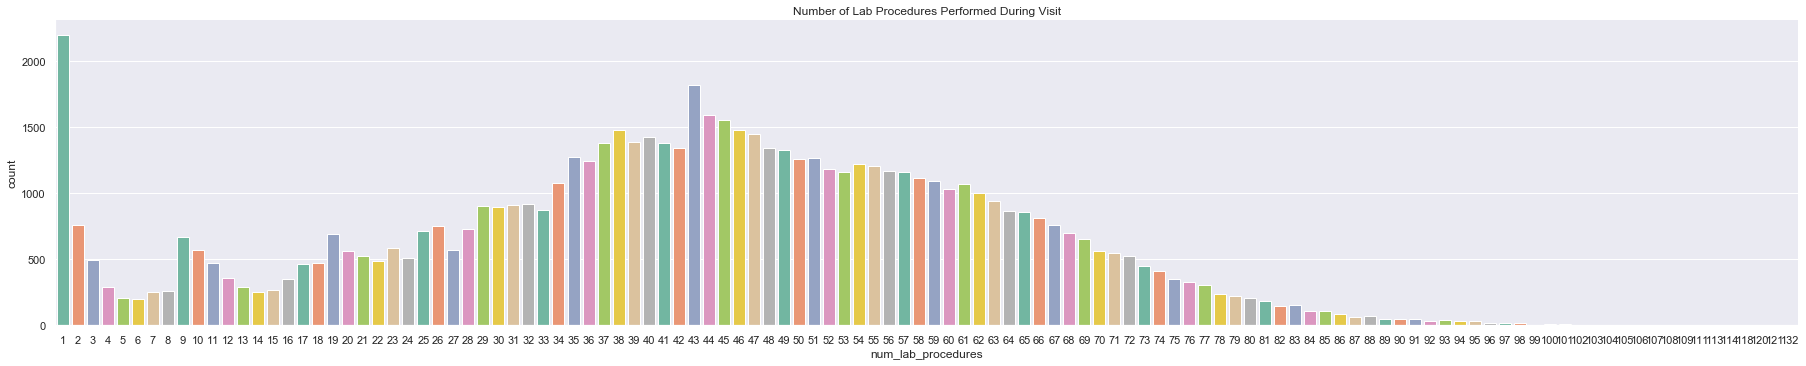

In [34]:
sns.catplot(x='num_lab_procedures', kind='count', palette='Set2', data=diabetes, aspect=5)
plt.title('Number of Lab Procedures Performed During Visit')
plt.show()

In [35]:
print('Lab Procedures Performed During Visit')
print('Average: {} lab procedures'.format(round(np.mean(diabetes.num_lab_procedures), 2)))
print('Median: {} lab procedures'.format(round(np.median(diabetes.num_lab_procedures), 2)))

Lab Procedures Performed During Visit
Average: 42.85 lab procedures
Median: 44.0 lab procedures


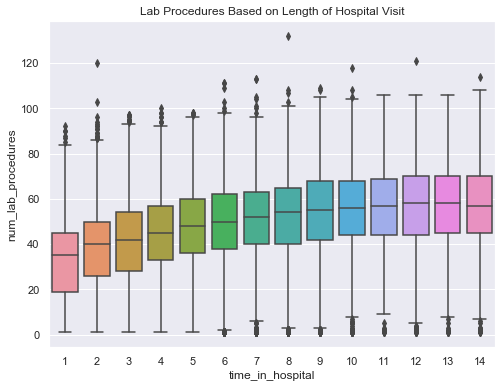

In [36]:
# do patients with longer hospital stays have more lab procedures?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_lab_procedures', data=diabetes)
plt.title('Lab Procedures Based on Length of Hospital Visit')
plt.show()

Based on the graph, some patients had over 100 lab procedures completed during their hospital visit, which is understandable given how long they stayed in the hospital. However, a few outliers exist for patients who had over 100 lab procedures done given how long they stayed. To make sure our data represents the majority of patients, we are removing these outliers.

In [37]:
diabetes.num_lab_procedures.describe()

count    67874.000000
mean        42.848985
std         19.933777
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64

In [38]:
diabetes[diabetes.num_lab_procedures > 100].describe()

,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,4.190476,9.404762,106.904762,2.880952,27.333333,0.119048,0.261905,0.333333,8.428571
std,3.240281,2.938886,6.547424,2.232819,9.105524,0.327770,0.734499,0.874201,1.212594
min,0.000000,2.000000,101.000000,0.000000,12.000000,0.000000,0.000000,0.000000,5.000000
25%,0.250000,7.250000,102.250000,1.000000,24.000000,0.000000,0.000000,0.000000,9.000000
50%,7.000000,9.000000,105.000000,3.000000,27.000000,0.000000,0.000000,0.000000,9.000000
75%,7.000000,12.000000,108.750000,5.000000,31.750000,0.000000,0.000000,0.000000,9.000000
max,7.000000,14.000000,132.000000,6.000000,61.000000,1.000000,4.000000,4.000000,9.000000


In [39]:
# remove rows that have over 101 lab procedures
diabetes = diabetes[diabetes.num_lab_procedures < 101]

## number of procedures (other than lab)

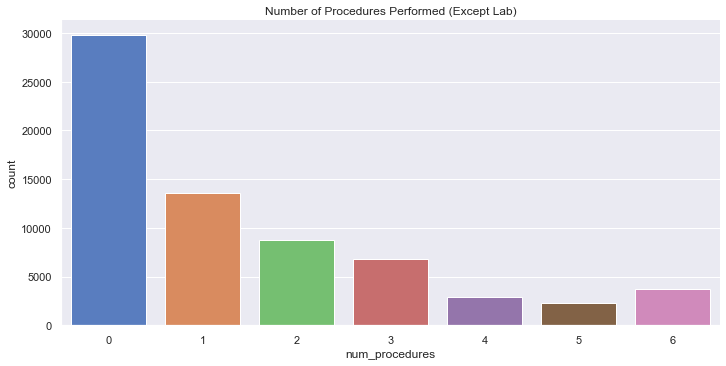

In [40]:
sns.catplot(x='num_procedures', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Procedures Performed (Except Lab)')
plt.show()

In [41]:
print('Procedures Performed During Visit Besides Lab:')
print('Average: {} procedures'.format(round(np.mean(diabetes.num_procedures), 2)))
print('Median: {} procedures'.format(round(np.median(diabetes.num_procedures), 2)))

Procedures Performed During Visit Besides Lab:
Average: 1.43 procedures
Median: 1.0 procedures


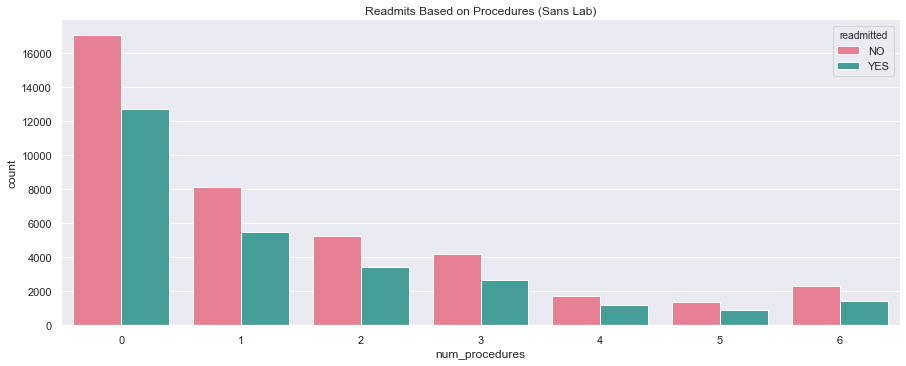

In [42]:
# do the number of tests performed indicate whether a patient will be readmitted?
sns.catplot(x='num_procedures', hue='readmitted', kind='count', palette='husl', aspect=2.5, data=diabetes, legend_out=False)
plt.title('Readmits Based on Procedures (Sans Lab)')
plt.show()

## number of medications

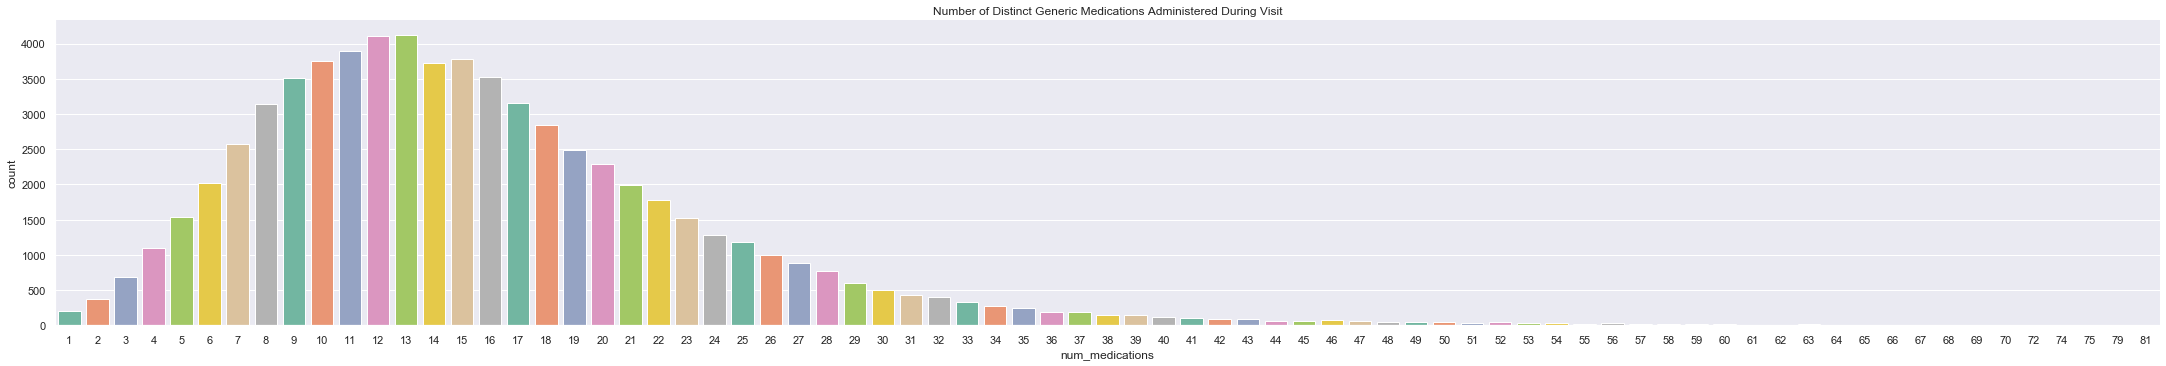

In [43]:
sns.catplot(x='num_medications', kind='count', palette='Set2', data=diabetes, aspect=6)
plt.title('Number of Distinct Generic Medications Administered During Visit')
plt.show()

In [44]:
print('Distinct Generic Medications Administered During Visit:')
print('Average: {} medications'.format(round(np.mean(diabetes.num_medications), 2)))
print('Median: {} medications'.format(round(np.median(diabetes.num_medications), 2)))

Distinct Generic Medications Administered During Visit:
Average: 15.66 medications
Median: 14.0 medications


In [45]:
diabetes.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39978.0,15.396318,8.517678,1.0,10.0,14.0,19.0,79.0
YES,27854.0,16.045703,7.894301,1.0,11.0,15.0,20.0,81.0


In [46]:
diabetes.num_medications.describe()

count    67832.000000
mean        15.662976
std          8.273500
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

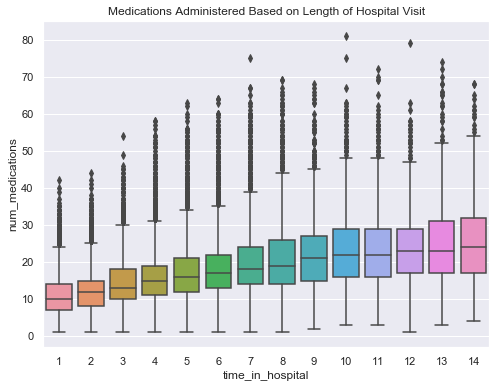

In [47]:
# how many medications are patients receiving during their visit?
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_in_hospital', y='num_medications', data=diabetes)
plt.title('Medications Administered Based on Length of Hospital Visit')
plt.show()

Patients spending more time in the hospital receive more medications, but there are a few that receive over 70 different kinds of medications. We are removing any patients that received over 70 medications. The 75% percentile of patients received 20 distinct medications.

In [48]:
diabetes[diabetes.num_medications > 70]

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
31624,Caucasian,Male,[60-70),Hospital,1,10,57,3,81,0,...,No,No,Down,No,No,No,Ch,Yes,YES,Elective
32235,Caucasian,Male,[50-60),Home,1,12,57,4,79,0,...,No,No,Up,No,No,No,Ch,Yes,NO,Elective
33930,Caucasian,Female,[60-70),Home,7,10,61,6,75,0,...,No,No,Down,No,No,No,Ch,Yes,NO,Emergency
40458,Caucasian,Male,[70-80),Hospital,1,13,73,6,72,1,...,No,No,Down,No,No,No,Ch,Yes,YES,Elective
46056,Caucasian,Male,[70-80),Home,7,13,62,6,74,0,...,No,No,Steady,No,No,No,Ch,Yes,NO,Emergency
50061,Caucasian,Male,[60-70),Home,7,11,68,6,72,0,...,No,No,Down,No,No,No,Ch,Yes,YES,Emergency
52452,Caucasian,Male,[60-70),Home,1,7,76,6,75,0,...,No,No,Down,No,No,No,Ch,Yes,NO,Elective


In [49]:
# remove rows with more than 71 medications
diabetes = diabetes[diabetes.num_medications < 71]

## number of outpatient visits

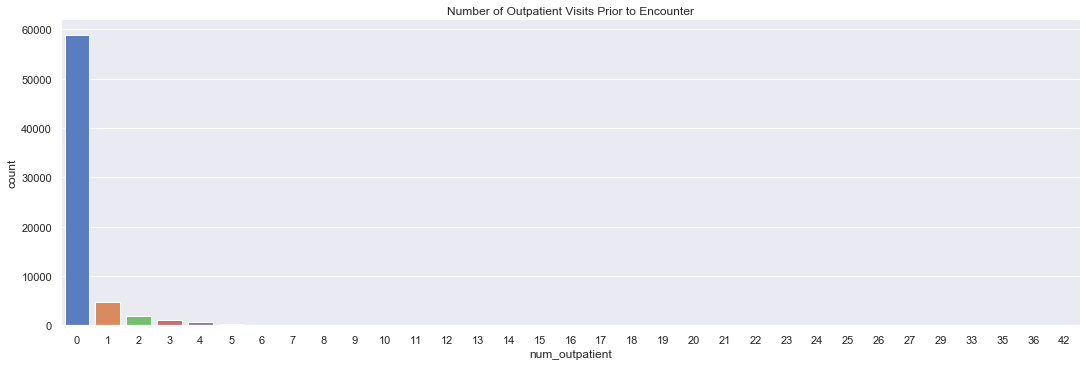

In [50]:
sns.catplot(x='num_outpatient', kind='count', palette='muted', data=diabetes, aspect=3)
plt.title('Number of Outpatient Visits Prior to Encounter')
plt.show()

In [51]:
diabetes.groupby('readmitted')['num_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39974.0,0.226197,0.919695,0.0,0.0,0.0,0.0,36.0
YES,27851.0,0.365876,1.260129,0.0,0.0,0.0,0.0,42.0


The number of outpatient visits for most patients is 0 so we are removing any patients who have more than 10 outpatient visits prior to their recorded hospital encounter.

In [52]:
# remove rows with more than 11 outpatient visits
diabetes = diabetes[diabetes.num_outpatient < 11]

## number of emergency visits

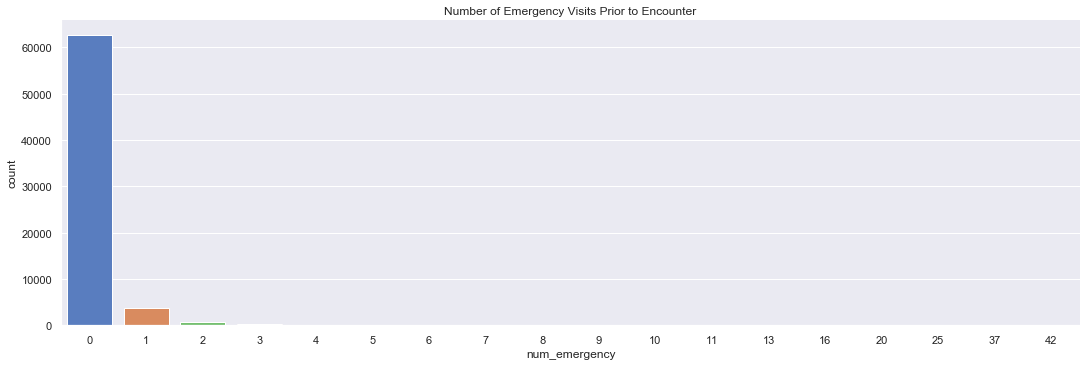

In [53]:
sns.catplot(x='num_emergency', kind='count', palette='muted', data=diabetes, aspect=3)
plt.title('Number of Emergency Visits Prior to Encounter')
plt.show()

In [54]:
diabetes.groupby('readmitted')['num_emergency'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39937.0,0.072689,0.423126,0.0,0.0,0.0,0.0,37.0
YES,27792.0,0.152562,0.623250,0.0,0.0,0.0,0.0,42.0


The emergency visit numbers are heavily skewed, showing that the majority of patients did not have any visits to the emergency room in the year prior to their current appointment. We are removing any patients who visited the emergency room more than 8 times prior to their recorded hospital visit.

In [55]:
# remove rows with more than 8 emergency room vists
diabetes = diabetes[diabetes.num_emergency < 9]

## number of inpatient visits

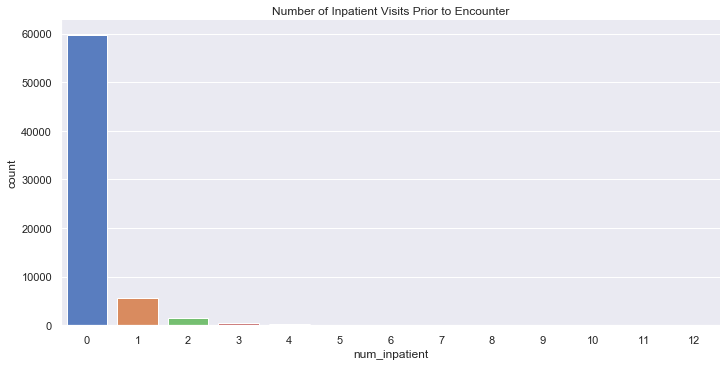

In [56]:
sns.catplot(x='num_inpatient', kind='count', palette='muted', data=diabetes, aspect=2)
plt.title('Number of Inpatient Visits Prior to Encounter')
plt.show()

In [57]:
diabetes.groupby('readmitted')['num_inpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39933.0,0.104350,0.415268,0.0,0.0,0.0,0.0,10.0
YES,27779.0,0.282336,0.787636,0.0,0.0,0.0,0.0,12.0


Inpatient visits are not common for most patients prior to this visit, so we are removing any patients who have visited the hospital more than 6 times prior to this visit.

In [58]:
diabetes = diabetes[diabetes.num_inpatient < 6]

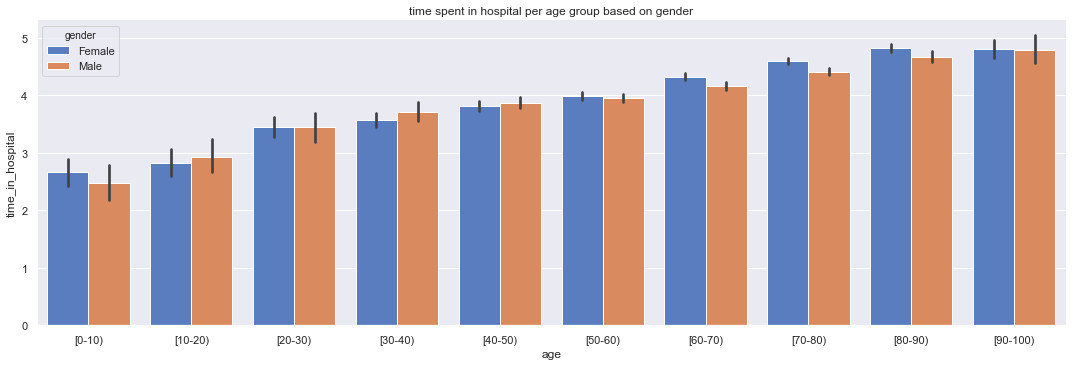

In [59]:
# who is spending the most time in hospitals during visits?
sns.catplot(x='age', y='time_in_hospital', hue='gender', palette='muted', aspect=3, kind='bar', data=diabetes, legend_out=False)
plt.title('time spent in hospital per age group based on gender')
plt.show()

In [60]:
chart_display(diabetes.age, diabetes.time_in_hospital)

time_in_hospital,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Total
age,,,,,,,,,,,,,,,
[0-10),28,51,47,16,6,3,0,1,0,0,0,0,0,0,152
[10-20),110,185,114,46,15,15,8,12,2,7,2,2,2,1,521
[20-30),181,267,244,155,76,44,24,18,14,24,10,7,2,6,1072
[30-40),448,634,520,314,218,122,101,70,41,41,34,18,19,11,2591
[40-50),1220,1383,1177,812,568,404,322,223,136,88,78,63,63,52,6589
[50-60),2205,2238,2095,1594,1056,766,580,400,297,239,148,136,106,90,11950
[60-70),2428,2600,2677,1991,1436,1051,841,653,391,336,260,197,169,129,15159
[70-80),2280,2720,2946,2338,1787,1332,1033,783,545,416,335,255,221,170,17161
[80-90),1081,1504,1906,1568,1138,968,727,520,354,260,243,174,135,140,10718


# patient diagnoses

## number of diagnoses

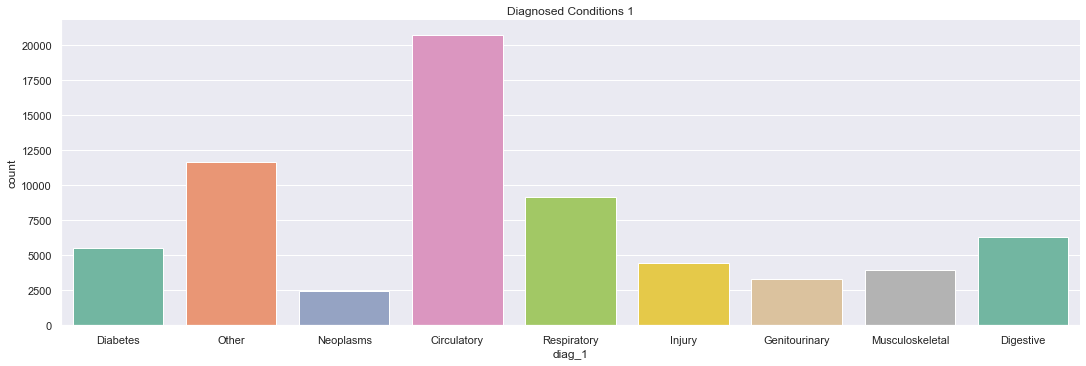

In [61]:
sns.catplot(x='diag_1', kind='count', palette='Set2', data=diabetes, aspect=3)
plt.title('Diagnosed Conditions 1')
plt.show()

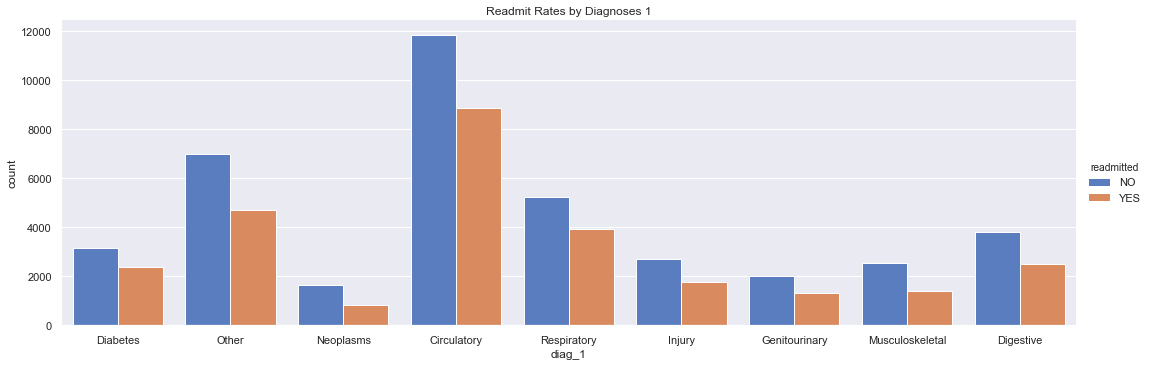

In [62]:
sns.catplot(x='diag_1', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 1')
plt.show()

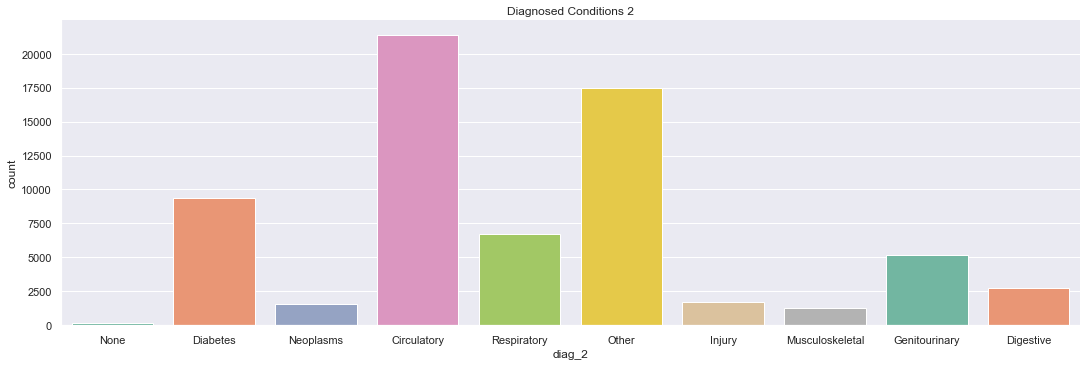

In [63]:
sns.catplot(x='diag_2', kind='count', palette='Set2', data=diabetes, aspect=3)
plt.title('Diagnosed Conditions 2')
plt.show()

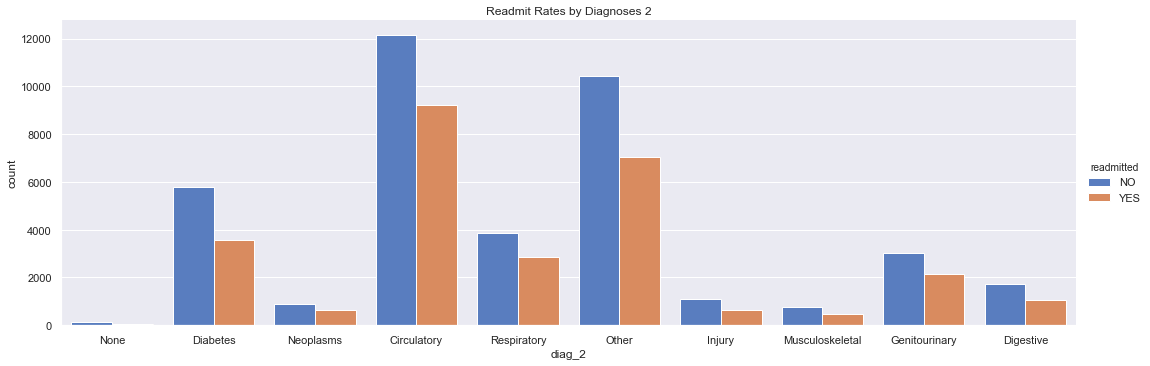

In [64]:
sns.catplot(x='diag_2', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 2')
plt.show()

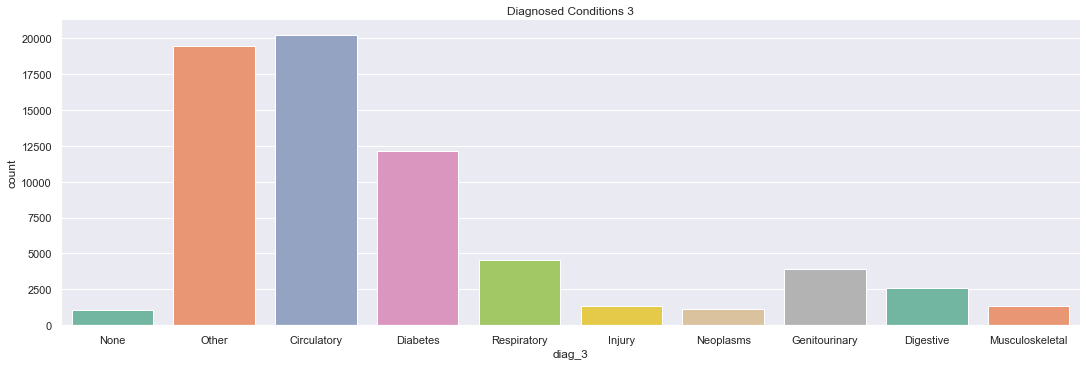

In [65]:
sns.catplot(x='diag_3', kind='count', palette='Set2', data=diabetes, aspect=3)
plt.title('Diagnosed Conditions 3')
plt.show()

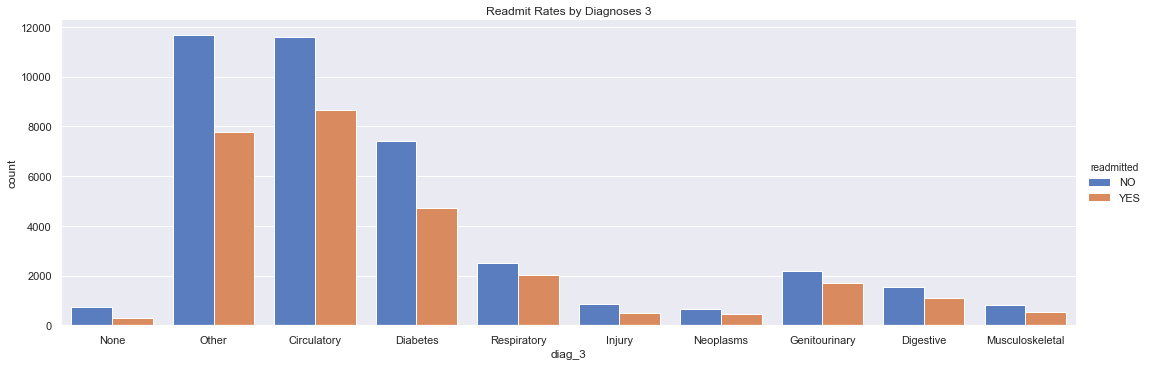

In [66]:
sns.catplot(x='diag_3', hue='readmitted', kind='count', palette='muted', aspect=3, data=diabetes)
plt.title('Readmit Rates by Diagnoses 3')
plt.show()

In [67]:
diabetes.diag_3.unique()

array(['None', 'Other', 'Circulatory', 'Diabetes', 'Respiratory',
       'Injury', 'Neoplasms', 'Genitourinary', 'Digestive',
       'Musculoskeletal'], dtype=object)

# number of diagnoses, glucose levels, and HbA1C test

Here, we are covering number_diagnoses, max_glu_serum, and HbA1C result.

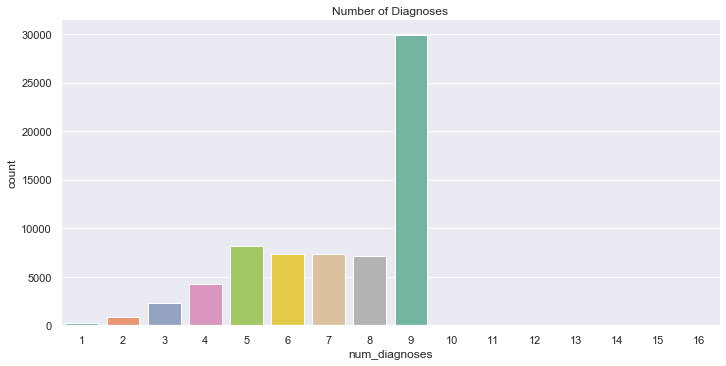

In [68]:
sns.catplot(x='num_diagnoses', kind='count', palette='Set2', data=diabetes, aspect=2)
plt.title('Number of Diagnoses')
plt.show()

In [69]:
print('Number of Diagnoses:')
print('Average: {} diagnoses'.format(round(np.mean(diabetes.num_diagnoses), 2)))
print('Median: {} diagnoses'.format(round(np.median(diabetes.num_diagnoses), 2)))

Number of Diagnoses:
Average: 7.24 diagnoses
Median: 8.0 diagnoses


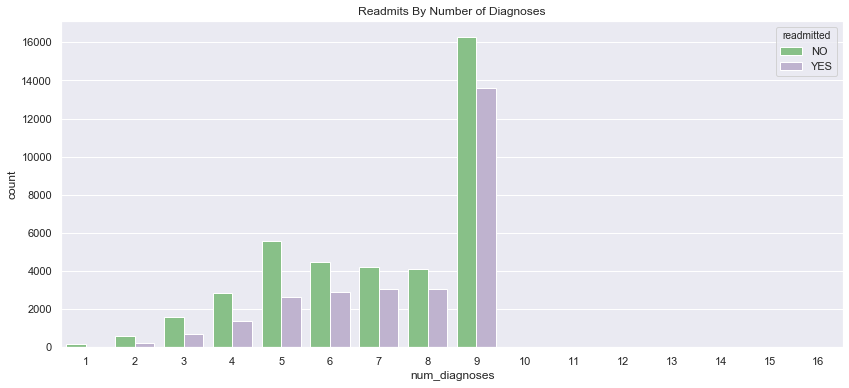

In [70]:
# number of diagnoses and readmit rate
plt.figure(figsize=(14, 6))
sns.countplot(x='num_diagnoses', hue='readmitted', palette='Accent', data=diabetes)
plt.title('Readmits By Number of Diagnoses')
plt.show()

In [71]:
# number of diagnoses
chart_display(diabetes.readmitted, diabetes.num_diagnoses)

num_diagnoses,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Total
readmitted,,,,,,,,,,,,,,,,,
NO,154,598,1591,2873,5554,4480,4218,4119,16295,6,2,3,6,2,3,18,39922
YES,34,243,683,1405,2650,2911,3074,3057,13605,2,4,3,4,3,2,9,27689
Total,188,841,2274,4278,8204,7391,7292,7176,29900,8,6,6,10,5,5,27,67611


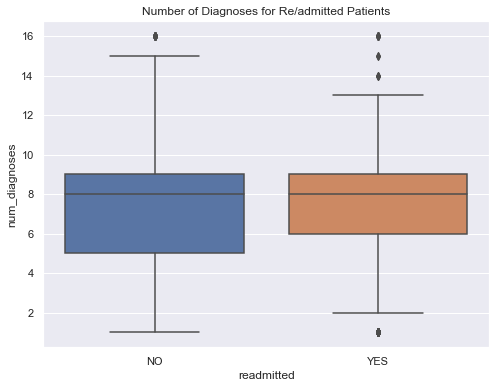

In [72]:
# how many diagnoses do readmitted patients have?
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='num_diagnoses', data=diabetes)
plt.title('Number of Diagnoses for Re/admitted Patients')
plt.show()

## glucose serum test results

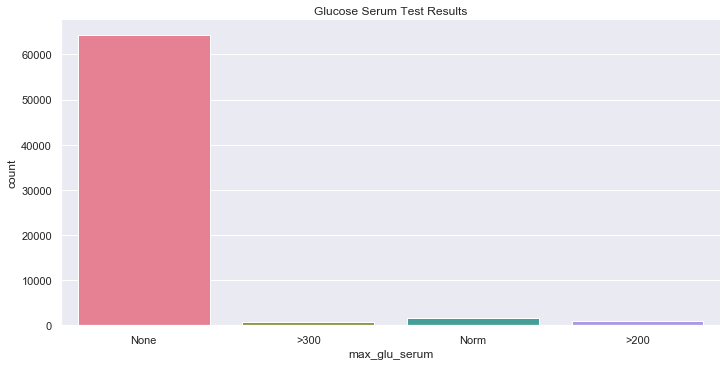

In [73]:
sns.catplot(x='max_glu_serum', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('Glucose Serum Test Results')
plt.show()

Since the majority of patients do not have a glucose reading, they will be excluded for the next graph in order to show the readmit rates for patients who do have a reading.

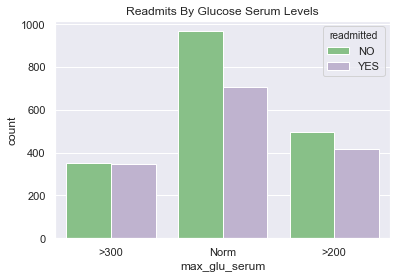

In [74]:
# exclude patients without a glucose reading
glucose_none = diabetes[diabetes.max_glu_serum != 'None']

# glucose serum results and readmit impact
sns.countplot(x='max_glu_serum', hue='readmitted', palette='Accent', data=glucose_none)
plt.title('Readmits By Glucose Serum Levels')
plt.show()

In [75]:
chart_display(diabetes.readmitted, diabetes.max_glu_serum)

max_glu_serum,>200,>300,None,Norm,Total
readmitted,,,,,
NO,496,352,38107,967,39922
YES,419,348,26215,707,27689
Total,915,700,64322,1674,67611


## HbA1C results

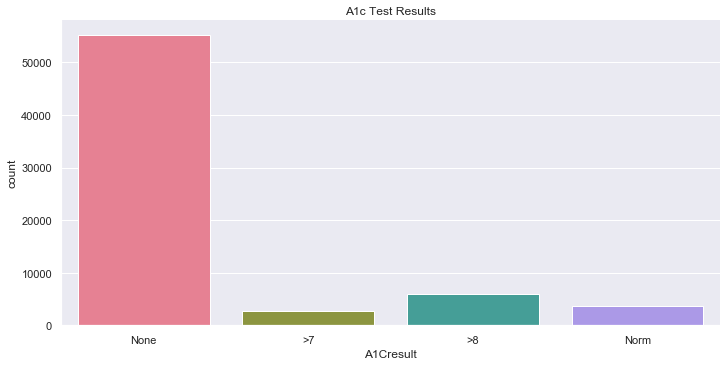

In [76]:
sns.catplot(x='A1Cresult', kind='count', palette='husl', data=diabetes, aspect=2)
plt.title('A1c Test Results')
plt.show()

Similar to the glucose reading, the majority of patients also do not have an A1c test reading. In order to understand the impact of A1c tests on readmit rates, patients without a reading will be excluded.

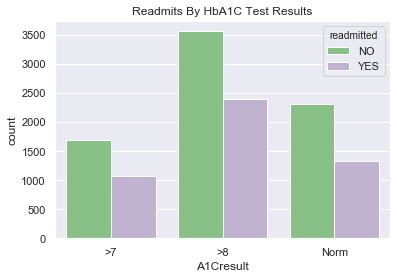

In [77]:
# exclude patients without an A1C reading
alc_none = diabetes[diabetes.A1Cresult != 'None']

# A1C results and readmit impact
sns.countplot(x='A1Cresult', hue='readmitted', palette='Accent', data=alc_none)
plt.title('Readmits By HbA1C Test Results')
plt.show()

In [78]:
chart_display(diabetes.readmitted, diabetes.A1Cresult)

A1Cresult,>7,>8,None,Norm,Total
readmitted,,,,,
NO,1696,3563,32349,2314,39922
YES,1074,2396,22888,1331,27689
Total,2770,5959,55237,3645,67611


## box plots

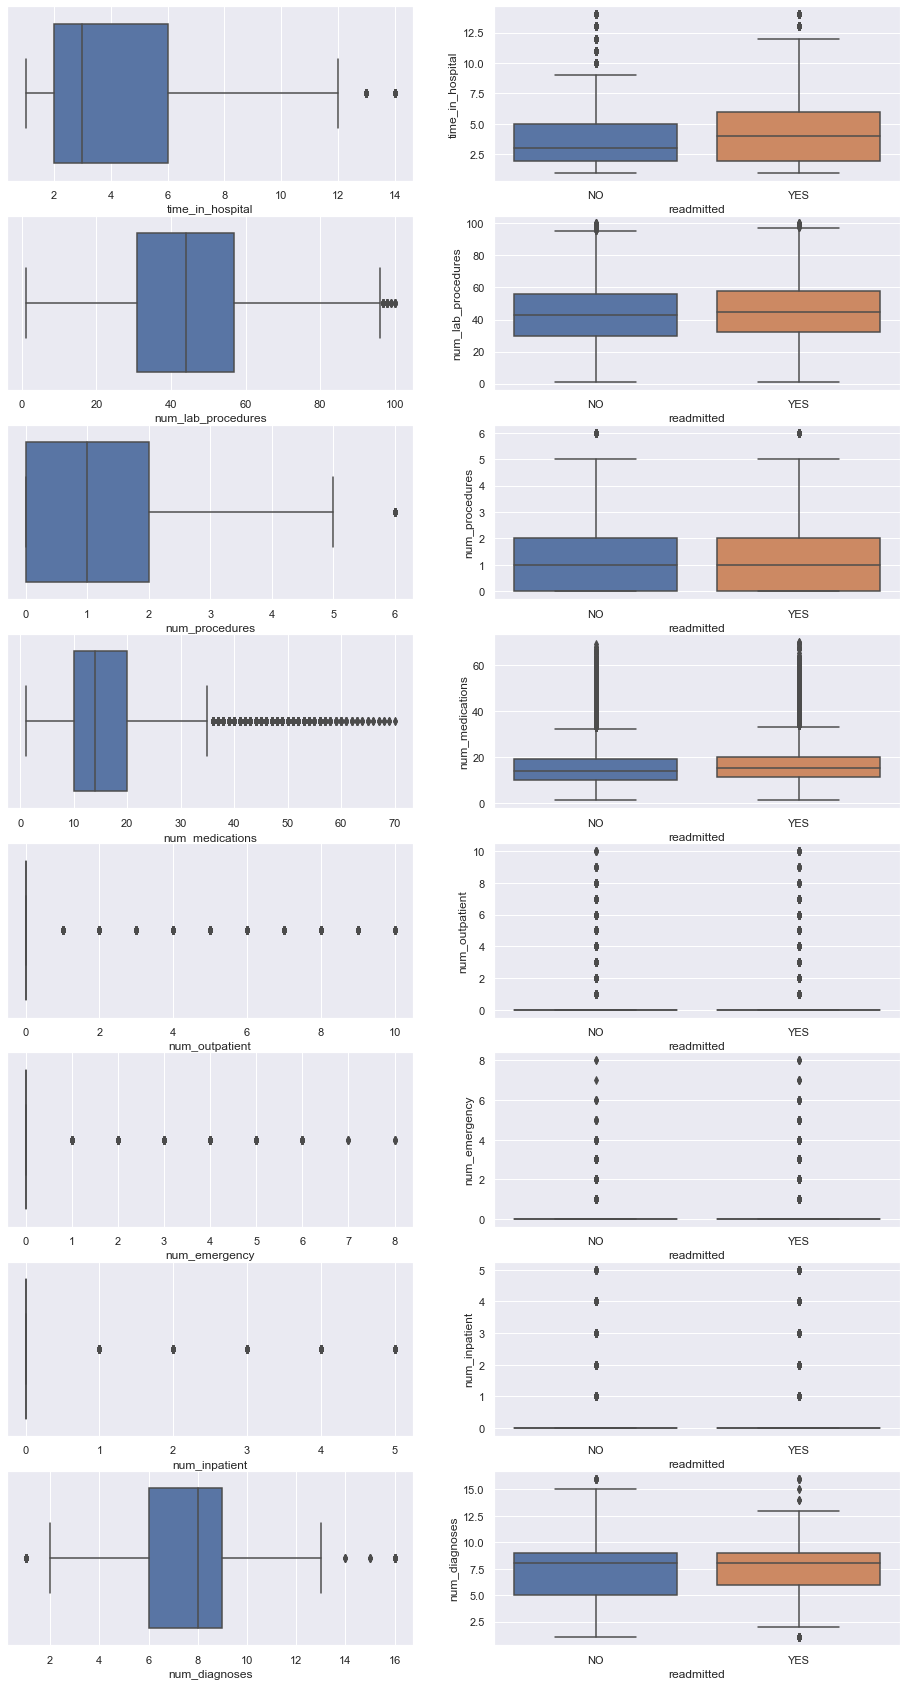

In [79]:
plt.figure(figsize=(16, 34))
plt.subplot(9,2,1)
sns.boxplot(x='time_in_hospital', data=diabetes)
plt.subplot(9,2,2)
sns.boxplot(x='readmitted', y='time_in_hospital', data=diabetes)
plt.subplot(9,2,3)
sns.boxplot(x='num_lab_procedures', data=diabetes)
plt.subplot(9,2,4)
sns.boxplot(x='readmitted', y='num_lab_procedures', data=diabetes)
plt.subplot(9,2,5)
sns.boxplot(x='num_procedures', data=diabetes)
plt.subplot(9,2,6)
sns.boxplot(x='readmitted', y='num_procedures', data=diabetes)
plt.subplot(9,2,7)
sns.boxplot(x='num_medications', data=diabetes)
plt.subplot(9,2,8)
sns.boxplot(x='readmitted', y='num_medications', data=diabetes)
plt.subplot(9,2,9)
sns.boxplot(x='num_outpatient', data=diabetes)
plt.subplot(9,2,10)
sns.boxplot(x='readmitted', y='num_outpatient', data=diabetes)
plt.subplot(9,2,11)
sns.boxplot(x='num_emergency', data=diabetes)
plt.subplot(9,2,12)
sns.boxplot(x='readmitted', y='num_emergency', data=diabetes)
plt.subplot(9,2,13)
sns.boxplot(x='num_inpatient', data=diabetes)
plt.subplot(9,2,14)
sns.boxplot(x='readmitted', y='num_inpatient', data=diabetes)
plt.subplot(9,2,15)
sns.boxplot(x='num_diagnoses', data=diabetes)
plt.subplot(9,2,16)
sns.boxplot(x='readmitted', y='num_diagnoses', data=diabetes)

plt.show()

# medications

Let's take a look at changes in medications and diabetes medications.

## change in medications, dosage or brand

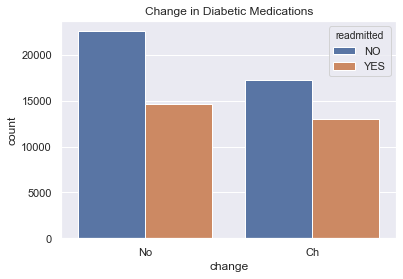

In [80]:
# change in medications
sns.countplot(x='change', hue='readmitted', data=diabetes)
plt.title('Change in Diabetic Medications')
plt.show()

In [81]:
chart_display(diabetes.change, diabetes.readmitted)

readmitted,NO,YES,Total
change,,,
Ch,17318,13033,30351
No,22604,14656,37260
Total,39922,27689,67611


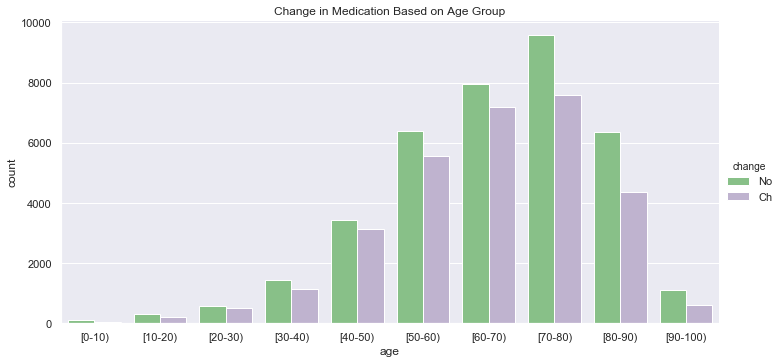

In [82]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='age', hue='change', kind='count', palette='Accent', aspect=2, data=diabetes)
plt.title('Change in Medication Based on Age Group')
plt.show()

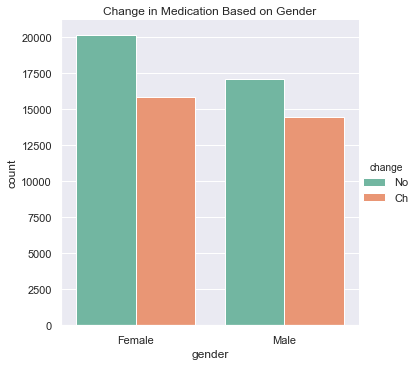

In [83]:
# who is likely to have a change in medication?
sns.catplot(x='gender', hue='change', kind='count', palette='Set2', data=diabetes)
plt.title('Change in Medication Based on Gender')
plt.show()

In [84]:
chart_display(diabetes.gender, diabetes.change)

change,Ch,No,Total
gender,,,
Female,15852,20172,36024
Male,14499,17088,31587
Total,30351,37260,67611


## diabetic medications prescribed

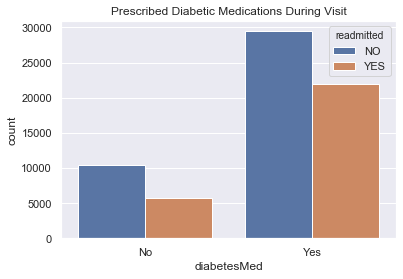

In [85]:
sns.countplot(x='diabetesMed', hue='readmitted', data=diabetes)
plt.title('Prescribed Diabetic Medications During Visit')
plt.show()

In [86]:
chart_display(diabetes.diabetesMed, diabetes.readmitted)

readmitted,NO,YES,Total
diabetesMed,,,
No,10466,5759,16225
Yes,29456,21930,51386
Total,39922,27689,67611


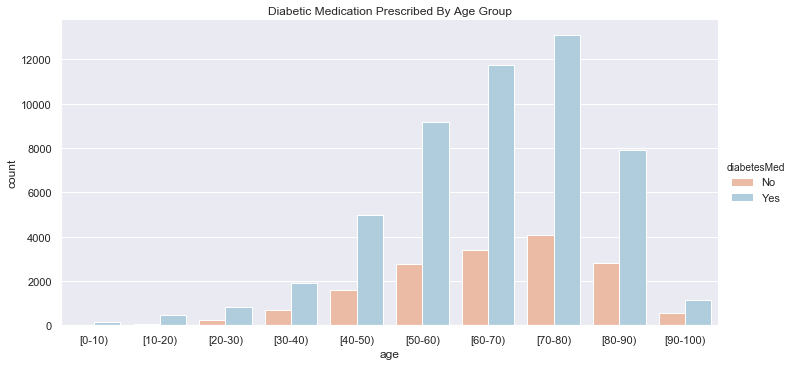

In [87]:
# which age group is likely to have a change in diabetes medication?
sns.catplot(x='age', hue='diabetesMed', kind='count', palette='RdBu', aspect=2, data=diabetes)
plt.title('Diabetic Medication Prescribed By Age Group')
plt.show()

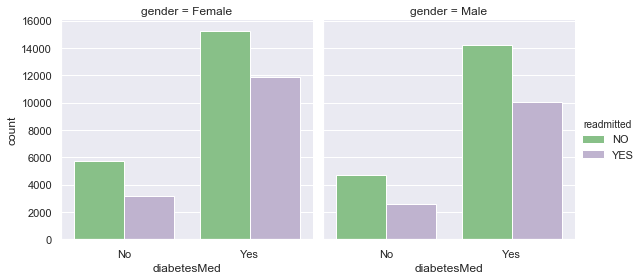

In [88]:
# who is likely or not likely to have a change in medication?
sns.catplot(x='diabetesMed', hue='readmitted', col='gender', palette='Accent', data=diabetes, kind='count', height=4, aspect=1)
plt.show()

## medications used by patients

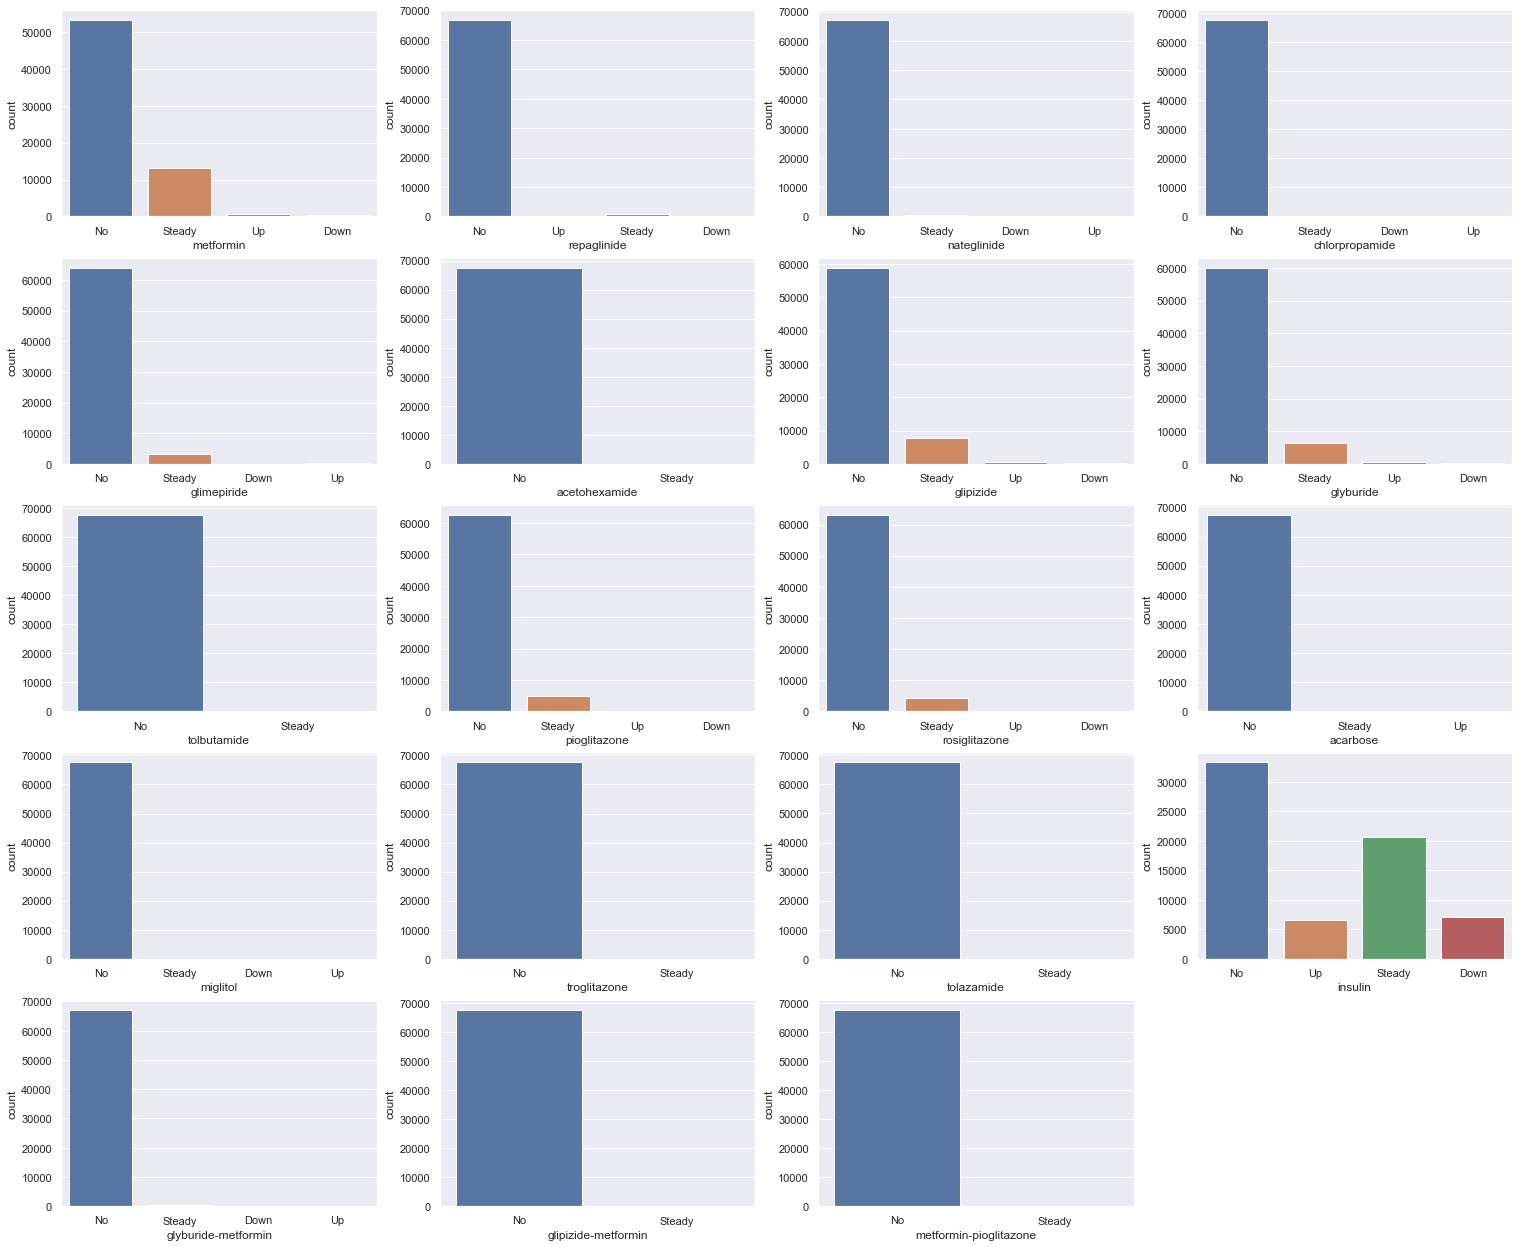

In [89]:
plt.figure(figsize=(26, 22))
plt.subplot(541)
sns.countplot(x='metformin', data=diabetes)
plt.subplot(542)
sns.countplot(x='repaglinide', data=diabetes)
plt.subplot(543)
sns.countplot(x='nateglinide', data=diabetes)
plt.subplot(544)
sns.countplot(x='chlorpropamide', data=diabetes)
plt.subplot(545)
sns.countplot(x='glimepiride', data=diabetes)
plt.subplot(546)
sns.countplot(x='acetohexamide', data=diabetes)
plt.subplot(547)
sns.countplot(x='glipizide', data=diabetes)
plt.subplot(548)
sns.countplot(x='glyburide', data=diabetes)
plt.subplot(549)
sns.countplot(x='tolbutamide', data=diabetes)
plt.subplot(5,4,10)
sns.countplot(x='pioglitazone', data=diabetes)
plt.subplot(5,4,11)
sns.countplot(x='rosiglitazone', data=diabetes)
plt.subplot(5,4,12)
sns.countplot(x='acarbose', data=diabetes)
plt.subplot(5,4,13)
sns.countplot(x='miglitol', data=diabetes)
plt.subplot(5,4,14)
sns.countplot(x='troglitazone', data=diabetes)
plt.subplot(5,4,15)
sns.countplot(x='tolazamide', data=diabetes)
plt.subplot(5,4,16)
sns.countplot(x='insulin', data=diabetes)
plt.subplot(5,4,17)
sns.countplot(x='glyburide-metformin', data=diabetes)
plt.subplot(5,4,18)
sns.countplot(x='glipizide-metformin', data=diabetes)
plt.subplot(5,4,19)
sns.countplot(x='metformin-pioglitazone', data=diabetes)
plt.show()

Dosages for insulin shows the most activity out of all diabetic medications, most of which aren't prescribed to patients.

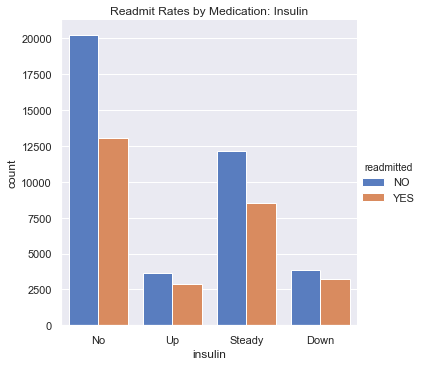

In [90]:
sns.catplot(x='insulin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Insulin')
plt.show()

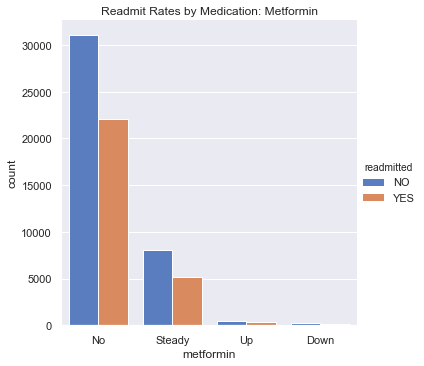

In [91]:
sns.catplot(x='metformin', hue='readmitted', kind='count', palette='muted', data=diabetes)
plt.title('Readmit Rates by Medication: Metformin')
plt.show()

In [92]:
diabetes = diabetes.reset_index(drop=True)

In [93]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67611 entries, 0 to 67610
Data columns (total 41 columns):
race                        67611 non-null object
gender                      67611 non-null object
age                         67611 non-null object
discharge_disposition_id    67611 non-null object
admission_source_id         67611 non-null int64
time_in_hospital            67611 non-null int64
num_lab_procedures          67611 non-null int64
num_procedures              67611 non-null int64
num_medications             67611 non-null int64
num_outpatient              67611 non-null int64
num_emergency               67611 non-null int64
num_inpatient               67611 non-null int64
diag_1                      67611 non-null object
diag_2                      67611 non-null object
diag_3                      67611 non-null object
num_diagnoses               67611 non-null int64
max_glu_serum               67611 non-null object
A1Cresult                   67611 non-null object


In [94]:
# save cleaned dataset to new file for storytelling and visualization

diabetes.to_csv('diabetes_visual.csv')